In [1]:
# Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

Original Image


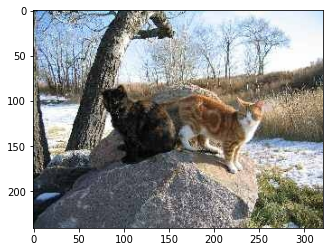

In [2]:
# read image
img = cv2.imread("inp1.jpg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
print("Original Image")
plt.imshow(img)

In [3]:
#converting color scale from BGR to GRAY
inputImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialize black image of size equal to given image
outputImg = np.zeros(inputImg.shape)
    
#padding the image with zeros
inputImg = np.pad(inputImg, (1, 1), 'constant', constant_values=(0))
   
#creating two filters for horizontal and vertical edge detection
fh = np.array([[-1.0,-2.0,-1.0],[0.0,0.0,0.0],[1.0,2.0,1.0]])
fy = np.array([[-1.0,0.0,1.0],[-2.0,0.0,2.0],[-1.0,0.0,1.0]])
    
#looping through image pixels
for row in range(1, inputImg.shape[0]-1):
    for col in range(1, inputImg.shape[1]-1):
        dx, dy = 0.0, 0.0
        
        #convolving both filters
        for x_filter in range(3):
            for y_filter in range(3):
                dx += inputImg[row+x_filter-1][col+y_filter-1]*fh[x_filter][y_filter]
                dy += inputImg[row+x_filter-1][col+y_filter-1]*fy[x_filter][y_filter]

        #magnitude of gradient (instead of just adding dx and dy. we calculate magnitude)
        pixel = np.sqrt(dx * dx + dy * dy)
        outputImg[row-1][col-1] = pixel

#normalizing pixels
outputImg *= 255.0/np.max(outputImg)

Sharpened Image


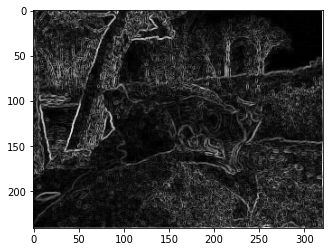

In [4]:
print("Sharpened Image")
plt.imshow(outputImg, cmap="gray")